In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('fma_metadata/features_dataset.csv')

In [3]:
data.head()

,track_id,chroma_cens_kurtosis,chroma_cens_max,chroma_cens_mean,chroma_cens_median,chroma_cens_min,chroma_cens_skew,chroma_cens_std,chroma_cqt_kurtosis,chroma_cqt_max,...,tonnetz_skew,tonnetz_std,zcr_kurtosis,zcr_max,zcr_mean,zcr_median,zcr_min,zcr_skew,zcr_std,genre_top
0,91062,-0.870,0.473,0.209,0.213,0.00000,-0.0496,0.1090,0.255,1.0,...,-0.0932,0.0252,49.600,0.351,0.0385,0.0356,0.00928,5.11,0.0188,4
1,16400,-0.486,0.529,0.270,0.262,0.00987,0.1260,0.0995,-0.724,1.0,...,-0.4250,0.0192,0.871,0.247,0.1150,0.1080,0.00000,0.93,0.0313,13
2,52860,2.060,0.469,0.254,0.239,0.02750,1.2400,0.0604,-0.218,1.0,...,-0.2070,0.0237,7.640,0.241,0.0870,0.0884,0.01760,-0.25,0.0128,7
3,87236,-0.376,0.556,0.294,0.285,0.03490,0.1870,0.0839,-1.020,1.0,...,0.2420,0.0233,9.530,0.705,0.1530,0.1440,0.01610,1.99,0.0624,4
4,21653,-0.341,0.623,0.224,0.213,0.00000,0.4950,0.1420,-0.672,1.0,...,-0.5560,0.0355,38.100,0.400,0.0444,0.0376,0.00000,4.85,0.0353,11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11851 entries, 0 to 11850
Data columns (total 79 columns):
track_id                       11851 non-null int64
chroma_cens_kurtosis           11851 non-null float64
chroma_cens_max                11851 non-null float64
chroma_cens_mean               11851 non-null float64
chroma_cens_median             11851 non-null float64
chroma_cens_min                11851 non-null float64
chroma_cens_skew               11851 non-null float64
chroma_cens_std                11851 non-null float64
chroma_cqt_kurtosis            11851 non-null float64
chroma_cqt_max                 11851 non-null float64
chroma_cqt_mean                11851 non-null float64
chroma_cqt_median              11851 non-null float64
chroma_cqt_min                 11851 non-null float64
chroma_cqt_skew                11851 non-null float64
chroma_cqt_std                 11851 non-null float64
chroma_stft_kurtosis           11851 non-null float64
chroma_stft_max              

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df2 = data.drop(['track_id','genre_top'],axis=1)

In [8]:
scaler = StandardScaler(copy=False)
scaler.fit(df2)
df2 = pd.DataFrame(scaler.transform(df2),columns=df2.columns)

In [9]:
X = df2
y = data['genre_top']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train.head()

,chroma_cens_kurtosis,chroma_cens_max,chroma_cens_mean,chroma_cens_median,chroma_cens_min,chroma_cens_skew,chroma_cens_std,chroma_cqt_kurtosis,chroma_cqt_max,chroma_cqt_mean,...,tonnetz_min,tonnetz_skew,tonnetz_std,zcr_kurtosis,zcr_max,zcr_mean,zcr_median,zcr_min,zcr_skew,zcr_std
5904,0.070664,0.892615,0.730440,0.515959,-0.297194,0.656668,0.142697,-0.118474,0.022575,0.809083,...,0.365044,-0.041846,-0.403842,-0.203521,0.549920,0.136652,-0.295364,-0.451918,-0.302800,1.045217
5298,-0.128206,-2.382263,-0.601582,-0.310859,-0.272810,-1.071181,-1.093201,-0.027013,0.022575,-0.362117,...,0.386986,-0.481679,-1.462456,-0.237159,-0.378346,1.014312,1.051268,2.699470,-0.608319,0.063085
5592,-0.414150,-0.098308,-0.188655,-0.173056,-0.297194,-0.403280,0.952238,-0.048277,0.022575,-0.862959,...,-0.029911,0.272475,0.769561,-0.252270,-1.508941,-0.697282,-0.436440,-0.451918,-1.004250,-0.941452
2978,0.703432,0.711348,-2.197344,-2.145936,-0.297194,1.641625,-0.558905,0.302710,0.022575,-2.103505,...,-0.841763,-0.962214,1.024649,0.763596,1.522654,-0.478647,-0.295364,-0.451918,0.997430,-0.508268
9787,-0.419685,0.578420,-0.441739,-0.230474,-0.297194,-0.014439,1.437962,-0.106207,0.022575,-0.292769,...,-0.666228,0.129426,1.471053,-0.198773,-1.112066,-1.300087,-1.266222,-0.451918,-0.245960,-0.885437


In [11]:
error_rates = list()
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test!=preds))

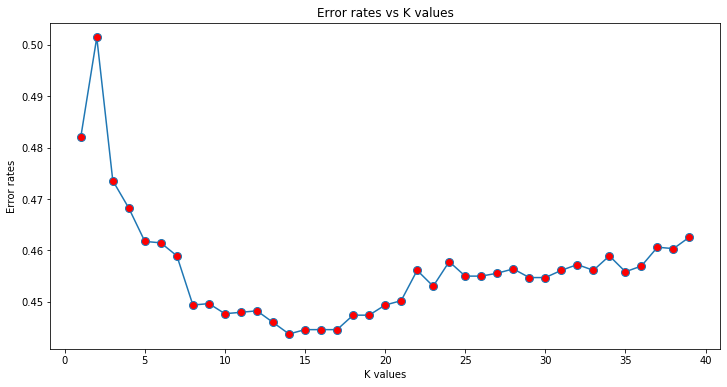

In [12]:
plt.figure(figsize=(12,6))
plt.xlabel('K values')
plt.ylabel('Error rates')
plt.title('Error rates vs K values')
plt.plot(range(1,40),error_rates,marker='o',markersize=8,markerfacecolor='red')

In [15]:
knn = KNeighborsClassifier(14)
knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

In [14]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.37      0.39      0.38        41
           2       0.43      0.38      0.40       232
           3       0.08      0.03      0.04        68
           4       0.56      0.62      0.59       752
           5       0.56      0.85      0.68       941
           6       0.50      0.29      0.37       116
           7       0.55      0.38      0.45       712
           8       1.00      0.13      0.23        86
           9       0.70      0.80      0.75       153
          10       0.38      0.39      0.38       159
          11       0.56      0.09      0.16       164
          12       1.00      0.10      0.18        10
          13       0.80      0.87      0.83        86
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00         3

    accuracy                           0.55      3556
   macro avg       0.47   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
